**This is an analysis of a dataset of investments made in Indian start-up companies found on Kaggle.
Data can be found here: https://www.kaggle.com/sudalairajkumar/indian-startup-funding**

In [117]:
# This analysis uses the Python 3 environment and the folowing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualisation
import seaborn as sns # visualisation

%matplotlib inline

**1. Gather - Understand the business**
We aim to answer the following questions:  
(a) Who are the most active investors and how significant are they?  
(b) What industries are the most heavily invested in?  
(c) Do active investors concentrate in certain industries and is there a correlation between investors?  

**2. Assess - Understand the data.**

In [118]:
# Import data
df = pd.read_csv('/Users/danielrigney/github/udacity_data_science_nanodegree/data_science_blog_post/startup_funding.csv')

In [119]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


**Important data points in this data set include**
1. Name of the start-up company that received investment.
2. Date of investment.
3. Industry and sub industry verticals.
4. Start-ups location.
5. The name of the investors.
6. Level of investment e.g. private equity, seed etc.
7. Investment amount.

In [120]:
df.describe()

,SNo
count,2372.000000
mean,1185.500000
std,684.881742
min,0.000000
25%,592.750000
50%,1185.500000
75%,1778.250000
max,2371.000000


There are 2372 investments made in this sample.

**3. Clean Data - Preparation of the data.**

In [121]:
df.isnull().sum() / df.shape[0]

SNo                 0.000000
Date                0.000000
StartupName         0.000000
IndustryVertical    0.072091
SubVertical         0.394604
CityLocation        0.075464
InvestorsName       0.003373
InvestmentType      0.000422
AmountInUSD         0.357083
Remarks             0.823356
dtype: float64

In [122]:
# Drop Remarks column as it has too many missing values.
# the subvertical may also be difficult to work with as ~39%.
# also the AmountInUSD is miss more than a third. Since this 
# is an important columns we will want to keep it.
df.drop(columns=['Remarks'], axis=1, inplace=True)

In [123]:
# Clean up investment amount.
df['AmountInUSD'].replace(to_replace=',', value='', regex=True, inplace=True)
df['AmountInUSD'].fillna(0, inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].astype(int)

In [124]:
# Need to remove .com and .in from names in case of duplicates.
df['StartupName'].replace(to_replace=['.in', '.com', '.co'], value='', regex=True, inplace=True)

In [125]:
# Remove rows where the Investor is unidentified.
df = df[~df['InvestorsName'].isin(['Undisclosed HNIs', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed investor', 'Undisclosed', 'Undisclosed investors', 'Undisclosed Investors', 'Undisclosed investors'])]

In [126]:
# Percentage of investments with unidentified investors.
(2372 - df.shape[0]) / 2372 * 100

4.3844856661045535

In [127]:
# Number of unique investors or investment groups.
df['InvestorsName'].nunique()

1878

**4. Analyse**

**(a) Who are the most active investors and how significant are they?**

In [128]:
# Analyse investments per investor and the range of investment sizes.
count_by_investor = df.groupby(['InvestorsName']).size().reset_index(name='NumberInvestmentsPerInvestor').sort_values(by='NumberInvestmentsPerInvestor', ascending=False)

# Select the top 20 most active investors to investigate further.
count_by_investor = count_by_investor[0:20]

most_active_investors = count_by_investor['InvestorsName'].tolist()
number_investments_investor = count_by_investor['NumberInvestmentsPerInvestor'].tolist()

cbi = count_by_investor.describe().reset_index()
avg = cbi[cbi['index']=='mean']['NumberInvestmentsPerInvestor'].values[0]
minimum = cbi[cbi['index']=='min']['NumberInvestmentsPerInvestor'].values[0]
maximum = cbi[cbi['index']=='max']['NumberInvestmentsPerInvestor'].values[0]

print('The most active investors made on average {} investments, with the most active making {} investments and least active making {} investments'.format(avg, minimum, maximum))

The most active investors made on average 9.95 investments, with the most active making 5.0 investments and least active making 24.0 investments


In [129]:
# Number of investments made by the 20 most active investors.
total = count_by_investor['NumberInvestmentsPerInvestor'].sum()
print('The total number of investments made by the 20 most active investors is {}.'.format({}))

The total number of investments made by the 20 most active investors is {}.


In [130]:
# Analyse the number of investments per investment type.
count_by_investment_type = df.groupby(['InvestmentType']).size().reset_index(name='NumberPerInvestmentType').sort_values(by='NumberPerInvestmentType', ascending=False)

investment_type = count_by_investment_type['InvestmentType'].tolist()
number_investments_type = count_by_investment_type['NumberPerInvestmentType'].tolist()

cbit = count_by_investment_type.describe().reset_index()
avg = cbit[cbit['index']=='mean']['NumberPerInvestmentType'].values[0]
minimum = cbit[cbit['index']=='min']['NumberPerInvestmentType'].values[0]
maximum = cbit[cbit['index']=='max']['NumberPerInvestmentType'].values[0]

print('The average number of investments by type {}. The most invested type had {} investments and least had {} investments'.format(avg, minimum, maximum))

The average number of investments by type 323.85714285714283. The most invested type had 1.0 investments and least had 1179.0 investments


**(b) What industries are the most heavily invested in?**

In [131]:
count_by_industry = df.groupby(['IndustryVertical']).size().reset_index(name='NumberInvestmentsPerIndustry').sort_values(by='NumberInvestmentsPerIndustry', ascending=False)
count_by_industry.head()

,IndustryVertical,NumberInvestmentsPerIndustry
93,Consumer Internet,722
645,Technology,301
694,eCommerce,162
145,ECommerce,50
239,Healthcare,29


In [132]:
# Number of unique industries.
count_by_industry.shape[0]

726

In [133]:
# Analyse the number of investment by industry.

# Select the top 10 most active industries to investigate further.
count_by_industry = count_by_industry[0:10]

most_active_industry = count_by_industry['IndustryVertical'].tolist()
number_investments_industry = count_by_industry['NumberInvestmentsPerIndustry'].tolist()

count_by_industry.describe()

,NumberInvestmentsPerIndustry
count,10.000000
mean,133.900000
std,226.945148
min,5.000000
25%,18.500000
50%,26.000000
75%,134.000000
max,722.000000


**(c) Do active investors concentrate in certain industries and is there a correlation between investors?**

In [134]:
active_df = df[df['InvestorsName'].isin(most_active_investors) & df['IndustryVertical'].isin(most_active_industry)]
active_df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
22,22,12/07/2017,Arcatron,Technology,Next Gen Mobility device manufacturer,Pune,Indian Angel Network,Seed Funding,0
46,46,28/07/2017,BigStylist,Consumer Internet,Beauty Services Marketplace,Mumbai,Info Edge (India) Ltd,Private Equity,1250000
47,47,28/07/2017,Gympik,Consumer Internet,online marketplace for discovering fitness cen...,bangalore,RoundGlass Partners,Seed Funding,0
55,55,06/06/2017,BHIVE Workspace,Consumer Internet,co-working spaces,Bangalore,Blume Ventures,Private Equity,1200000
84,84,16/06/2017,Eazyer,Consumer Internet,Online Restaurant Reservation Platform,Gurgaon,YouWeCan Ventures,Seed Funding,0


In [135]:
# Strip down the dataset to the most active investors and industries so we can visualise any trends.
count_by_investor_and_industry = active_df.groupby(['IndustryVertical', 'InvestorsName']).size().reset_index(name='NumberInvestmentsPerIndustry').sort_values(by='NumberInvestmentsPerIndustry', ascending=False)

In [136]:
# Number of active investors remaining in the smaller data set.
count_by_investor_and_industry['InvestorsName'].nunique()

18

In [137]:
# Number of industries remaining in the smaller data set.
count_by_investor_and_industry['IndustryVertical'].nunique()

7

**5. Model**
This analysis does not require any machine learning or deep learning models as the analysis above and the visualisation below can answer our business questions.

**6. Visualise**

In [138]:
def plot_bar_chart(categories_label, count, y_label, x_label, title):
    
    categories_pos = [i for i, _ in enumerate(categories_label)]
    
    plt.barh(categories_pos, count)

    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)

    plt.yticks(categories_pos, categories_label)

    plt.show()

In [139]:
def plot_scatter_chart(x, y, z, x_label, y_label, title):

    plt.scatter(x, y, s=z*z*10, alpha=0.4, edgecolors="grey", linewidth=2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.xticks(rotation=45)

    plt.show()    

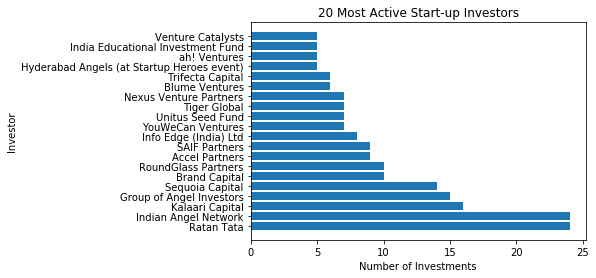

In [140]:
# Plot the number investments per investor.
plot_bar_chart(most_active_investors, number_investments_investor, "Investor", "Number of Investments", "20 Most Active Start-up Investors")

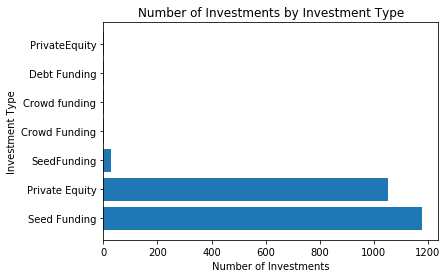

In [141]:
# Plot the number of investments per investment type and range of values.
plot_bar_chart(investment_type, number_investments_type, "Investment Type", "Number of Investments", "Number of Investments by Investment Type")

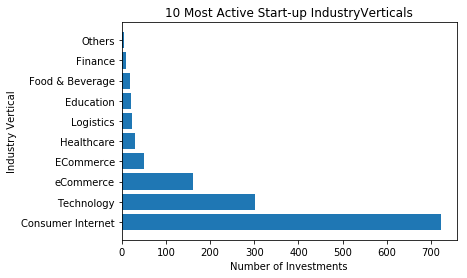

In [142]:
# Plot the number of investment by industry.
plot_bar_chart(most_active_industry, number_investments, "Industry Vertical", "Number of Investments", "10 Most Active Start-up IndustryVerticals")

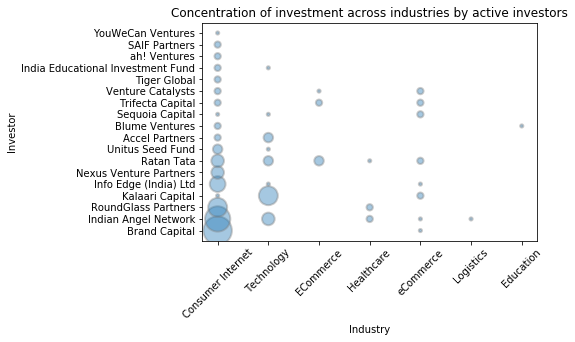

In [143]:
# Do active investors concentrate in certain industries and is there a correlation between investors?
industry = count_by_investor_and_industry['IndustryVertical']
investor = count_by_investor_and_industry['InvestorsName']
investment_count = count_by_investor_and_industry['NumberInvestmentsPerIndustry']

plot_scatter_chart(industry, investor, investment_count, "Industry", "Investor", "Concentration of investment across industries by active investors")